Importing nessacry libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tkinter as tk
from tkinter import messagebox



Loading And Merging the datasets 

In [2]:
# Load datasets
fake_df = pd.read_csv('fake.csv')
true_df = pd.read_csv('true.csv')

# Add a label column
fake_df['label'] = 0  
true_df['label'] = 1  

#shapes
print("Fake News Shape:", fake_df.shape)
print("True News Shape:", true_df.shape)

# Combine and shuffle
data = pd.concat([fake_df, true_df], axis=0).sample(frac=1).reset_index(drop=True)


Fake News Shape: (23481, 5)
True News Shape: (21417, 5)


In [3]:
data.head()

title  \
0         Trump spokesman to brief press on Thursday   
1   This Important Video Sums Up Why Donald Trump...   
2   OOPS: Trump‚Äôs Hotel Offers Qurans And Is Furn...   
3  Marseille attack suspect had shown Tunisian pa...   
4  Congress revisits Obamacare, this time with a ...   

                                                text       subject  \
0  (Reuters) - Donald Trump‚Äôs spokesman said his ...  politicsNews   
1  Despite the damage that the presidency of Geor...          News   
2  Donald Trump wanted the press to tour his bran...          News   
3  PARIS (Reuters) - The man suspected of carryin...     worldnews   
4  WASHINGTON (Reuters) - The U.S. Congress was w...  politicsNews   

                  date  label  
0    January 18, 2017       1  
1       April 13, 2016      0  
2   September 16, 2016      0  
3     October 2, 2017       1  
4  September 12, 2017       1

In [19]:
print('Total Number of fake news : ',data[data['label']== 0].shape[0])
print('Total Number of true news : ',data[data['label']== 1].shape[0])

Total Number of fake news :  23481
Total Number of true news :  21417


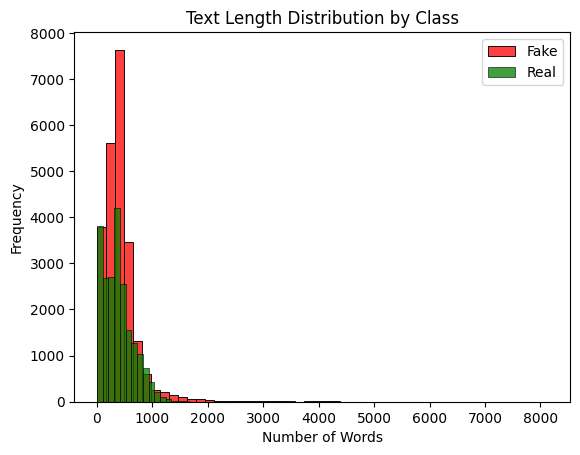

In [21]:
#plotting text lenght for both fake and true news
data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))

sns.histplot(data[data['label']==0]['text_length'], bins=50, color='red', label='Fake', kde=False)
sns.histplot(data[data['label']==1]['text_length'], bins=50, color='green', label='Real', kde=False )
plt.legend()
plt.title("Text Length Distribution by Class")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['cleaned_text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Inshal
[nltk_data]     Munaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Inshal
[nltk_data]     Munaf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
data.head()

title  \
0   Alec Baldwin Just Put Trump‚Äôs Idiot Supporter...   
1  Tokyo Governor Koike: No need for big change i...   
2  WATCH Huge Crowd Of Muslims Admit That ALL Mus...   
3  Vietnam orders prosecution of oil firm officia...   
4   Maine‚Äôs Governor Refuses To Answer One Simple...   

                                                text    subject  \
0  Saturday Night Live returned with a stellar co...       News   
1  TOKYO (Reuters) - Tokyo Governor Yuriko Koike,...  worldnews   
2        https://www.youtube.com/watch?v=8Mehk5eWcZA  left-news   
3  HANOI (Reuters) - Vietnamese police have order...  worldnews   
4  The Rachel Maddow Show attempted to reach out ...       News   

                 date  label  \
0       April 9, 2017      0   
1    October 6, 2017       1   
2         Feb 8, 2017      0   
3  December 19, 2017       1   
4    January 26, 2016      0   

                                        cleaned_text  
0  saturday night live returned stellar cold open...  
1  tokyo reuters tokyo governor yuriko koike whos...  
2                httpswwwyoutubecomwatchv8mehk5ewcza  
3  hanoi reuters vietnamese police ordered prosec...  
4  rachel maddow show attempted reach maine gover...

C:\Users\Inshal Munaf\AppData\Local\Temp\ipykernel_20844\3268291420.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


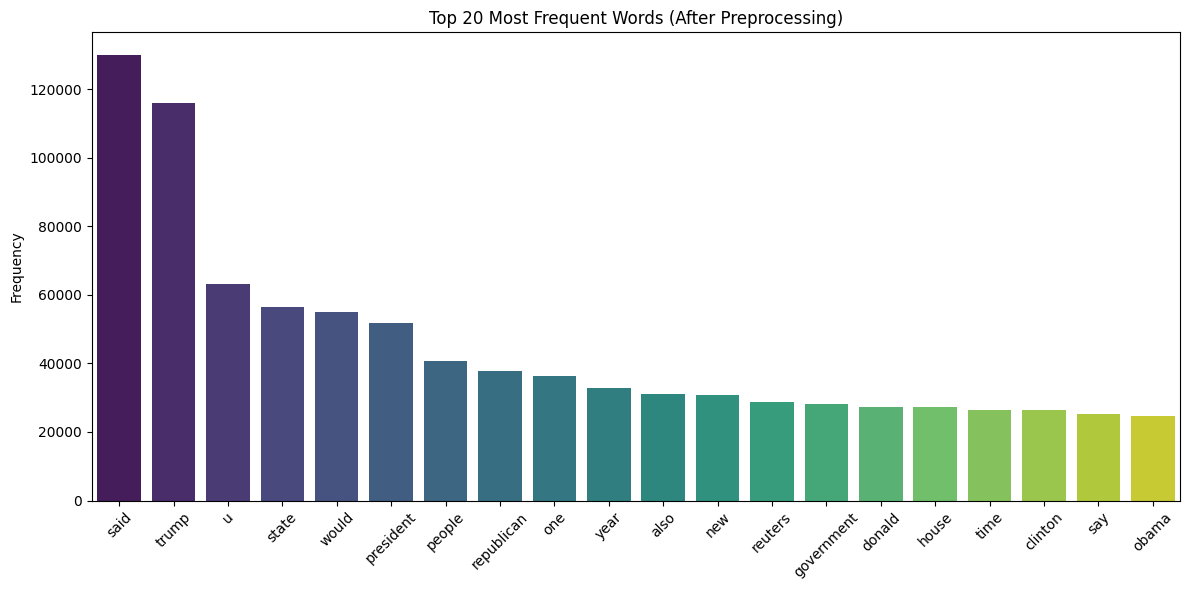

In [33]:
from collections import Counter

# Join all cleaned words
all_words = ' '.join(data['cleaned_text']).split()

# Count word frequencies
word_counts = Counter(all_words)

# Get the top 20 most common words
top_words = word_counts.most_common(20)

# Separate words and their counts
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top 20 Most Frequent Words (After Preprocessing)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Inshal Munaf\AppData\Local\Temp\ipykernel_20844\2905020025.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(fake_words), y=list(fake_counts), palette='Reds_r')
C:\Users\Inshal Munaf\AppData\Local\Temp\ipykernel_20844\2905020025.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(real_words), y=list(real_counts), palette='Greens_r')


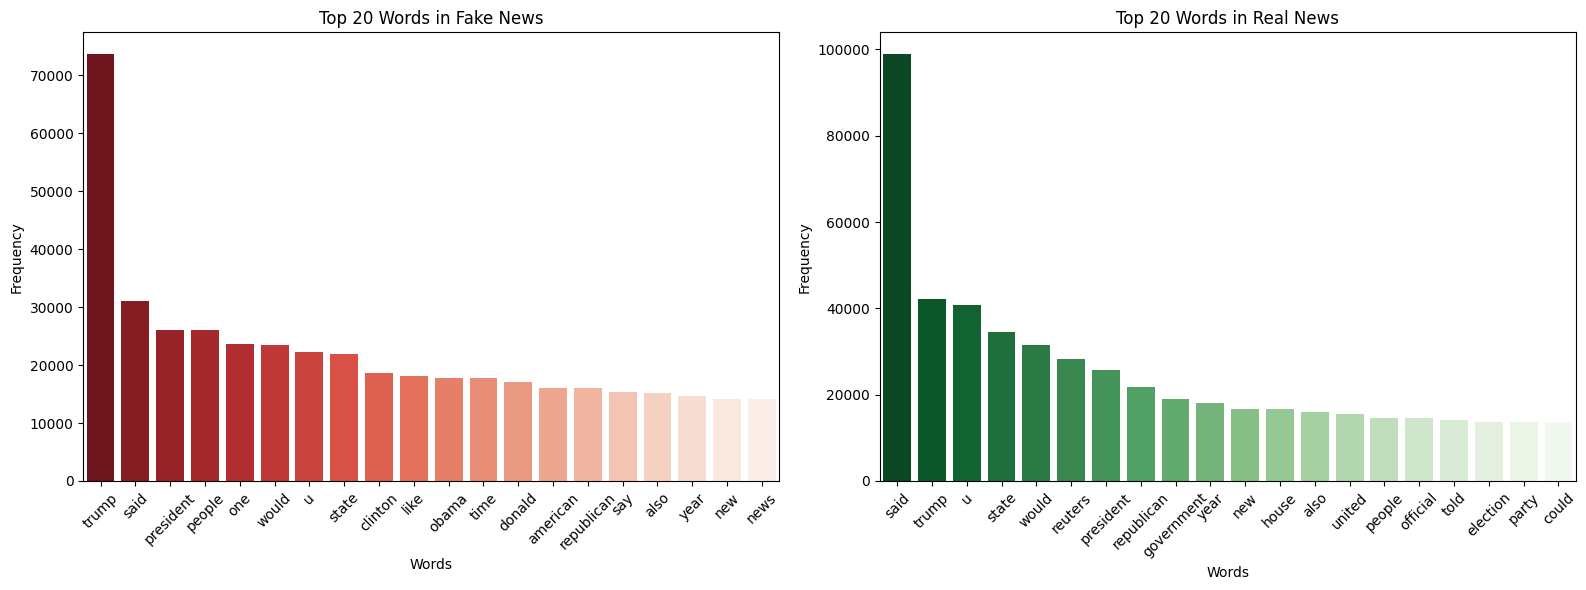

In [36]:
def get_top_words(text_series, top_n=20):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

# Get top words for fake and real news
top_fake = get_top_words(data[data['label'] == 0]['cleaned_text'], 20)
top_real = get_top_words(data[data['label'] == 1]['cleaned_text'], 20)

# Convert to plot-friendly format
fake_words, fake_counts = zip(*top_fake)
real_words, real_counts = zip(*top_real)

# Plot side by side
plt.figure(figsize=(16, 6))

# Fake News plot
plt.subplot(1, 2, 1)
sns.barplot(x=list(fake_words), y=list(fake_counts), palette='Reds_r')
plt.title("Top 20 Words in Fake News")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.xlabel("Words")

# Real News plot
plt.subplot(1, 2, 2)
sns.barplot(x=list(real_words), y=list(real_counts), palette='Greens_r')
plt.title("Top 20 Words in Real News")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.xlabel("Words")

plt.tight_layout()
plt.show()

Converting the text into vectors

In [34]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['label']


Splitting the data 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print("Lenght of X _train : ",len(X_train))
print("Lenght of Y _train : ",len(y_train))
print("Lenght of X _test : ",len(X_test))
print("Lenght of Y _test : ",len(y_test))

Lenght of X _train :  35918
Lenght of Y _train :  35918
Lenght of X _test :  8980
Lenght of Y _test :  8980


Training the model (Logistic)

In [43]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)


Training the model (NaiveBayes)

In [44]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)


Model Evaluation

In [45]:
def evaluate_model(y_true, y_pred, name):
    print(f"--- {name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, log_preds, "Logistic Regression")
evaluate_model(y_test, nb_preds, "Naive Bayes")


--- Logistic Regression Evaluation ---
Accuracy: 0.9902004454342984
Confusion Matrix:
 [[4678   51]
 [  37 4214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4729
           1       0.99      0.99      0.99      4251

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

--- Naive Bayes Evaluation ---
Accuracy: 0.950445434298441
Confusion Matrix:
 [[4491  238]
 [ 207 4044]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      4729
           1       0.94      0.95      0.95      4251

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



Confusion Matrix ---> Logistic Regression

In [ ]:
# Generate predictions
log_preds = log_model.predict(X_test)

# Compute confusion matrix
cm_log = confusion_matrix(y_test, log_preds)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [50]:
import tkinter as tk
from tkinter import ttk

def predict_news():
    input_text = entry.get("1.0", "end-1c")
    clean_input = clean_text(input_text)
    vec_input = vectorizer.transform([clean_input]).toarray()

    selected_model = model_var.get()
    if selected_model == "Logistic Regression":
        prediction = log_model.predict(vec_input)[0]
    else:
        prediction = nb_model.predict(vec_input)[0]

    result = "‚úÖ Real News" if prediction == 1 else "‚ùå Fake News"
    result_label.config(
        text=f"Prediction: {result}",
        fg="green" if prediction == 1 else "red"
    )

# Create main window
window = tk.Tk()
window.title("üì∞ Fake News Detection")
window.geometry("650x450")
window.configure(bg="#f8f9fa")

# Title Label
title = tk.Label(window, text="üß† Fake News Detector", font=("Helvetica", 20, "bold"), bg="#f8f9fa", fg="#2c3e50")
title.pack(pady=20)

# Model selection dropdown
model_frame = tk.Frame(window, bg="#f8f9fa")
model_frame.pack(pady=5)

tk.Label(model_frame, text="Select Model:", font=("Helvetica", 12), bg="#f8f9fa").pack(side="left", padx=5)

model_var = tk.StringVar(value="Logistic Regression")
model_dropdown = ttk.Combobox(model_frame, textvariable=model_var, values=["Logistic Regression", "Naive Bayes"], font=("Helvetica", 11), state="readonly", width=20)
model_dropdown.pack(side="left", padx=10)

# Text Entry
input_frame = tk.Frame(window, bg="#f8f9fa")
input_frame.pack(padx=20, pady=10, fill="both", expand=True)

tk.Label(input_frame, text="Enter News Content:", font=("Helvetica", 12), bg="#f8f9fa").pack(anchor="w")

entry = tk.Text(input_frame, height=10, font=("Helvetica", 11), wrap="word", bd=1, relief="solid")
entry.pack(fill="both", expand=True, pady=5)

# Predict Button
predict_button = tk.Button(window, text="üîç Predict", command=predict_news, font=("Helvetica", 13, "bold"), bg="#007BFF", fg="white", padx=15, pady=8)
predict_button.pack(pady=15)

# Result Label
result_label = tk.Label(window, text="", font=("Helvetica", 14, "bold"), bg="#f8f9fa")
result_label.pack(pady=10)

# Start GUI
window.mainloop()


In [47]:
data['text'].head()

0    Saturday Night Live returned with a stellar co...
1    TOKYO (Reuters) - Tokyo Governor Yuriko Koike,...
2          https://www.youtube.com/watch?v=8Mehk5eWcZA
3    HANOI (Reuters) - Vietnamese police have order...
4    The Rachel Maddow Show attempted to reach out ...
Name: text, dtype: object